
#2. Simulation of a two-dimensional random walk
=========

A random walk is a mathematical model that describes a path consisting of a succession of random
steps. In physics, random walks are fundamental in understanding diffusion processes, Brownian motion,
and other related phenomena. In this exercise, we will use Monte Carlo to simulate a two-dimensional
random walk.
    Consider a particle starting at the origin (0, 0) and that, at each time step, it moves one unit length
in a randomly chosen direction: up, down, left or right (i.e., along positive or negative x or y axes).
* Using a random number generator, choose the direction between the four possible (up, down, left, right), and move the particle at each time step. Compute and save $r^{\text{2}}= x^{\text{2}}_{\text{n}} + y^{\text{2}}_{\text{n}}$ at each time step n to keep track of the particle’s position.
* Perform the above simulation for 1000 time steps, repeating this process M = 1000 times to gather statistical data on the particle’s displacement. Average $r^{\text{2}}$ over all M simulations to get ⟨$r^{\text{2}}$⟩ as a function of n.
* Plot ⟨$r^{\text{2}}$⟩ versus n, and fit the data to a linear model ⟨$r^{\text{2}}$⟩ = 4Dn to find D.
* The expected value of D in this case is D = 0.25. Discuss the variability of paths taken during different simulations and how increasing M improves the accuracy of ⟨$r^{\text{2}}$⟩       


In [33]:
## Imports
import numpy as np 
import matplotlib.pyplot as plt
import random as rnd
from enum import Enum
from matplotlib.collections import LineCollection

#Define plotting config

def show_plot(title, xlabel, ylabel): 
    plt.title(title) 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()  

C:\Users\ersij\AppData\Local\Temp\ipykernel_13524\2375261420.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


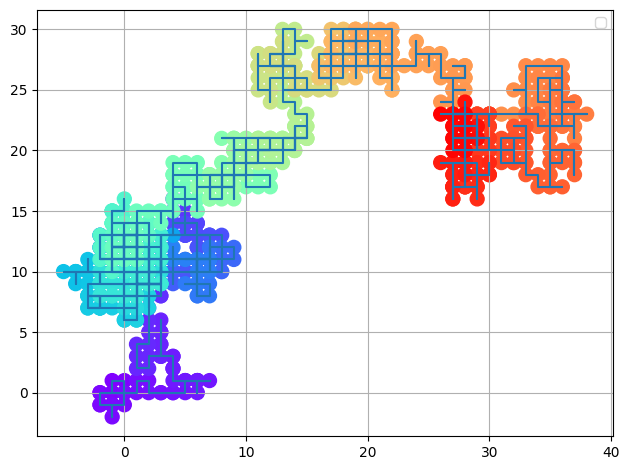

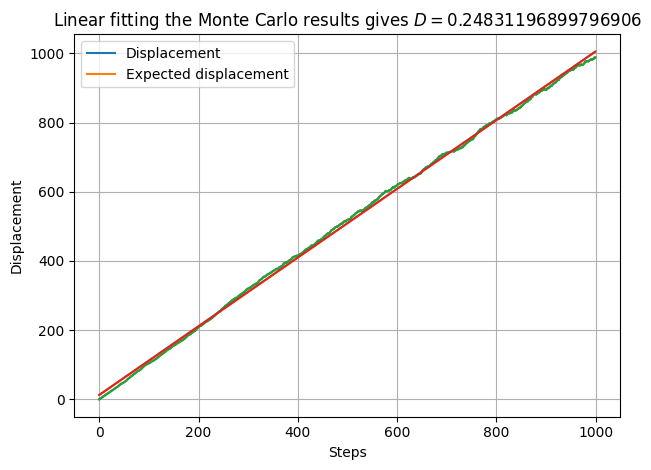

In [34]:
m = 1000 # number of Monte Carlo simulations
step_cnt = 1000 # number of steps in each simulation
expected = 0.25 # expected constant D

class Direction(Enum):
    UP = 1
    DOWN = 2
    LEFT = 3
    RIGHT = 4

def r_squared(x, y):
    return x**2 + y**2

def dir_to_coordinate(dir):
    match(dir):
        case Direction.UP:
            return 0, 1
        case Direction.DOWN:
            return 0, -1
        case Direction.LEFT:
            return -1, 0
        case Direction.RIGHT:
            return 1, 0

def monte_carlo():
    pos_x = [0]
    pos_y = [0]
    displacement = [0]
    for j in range(1, step_cnt):
        dir = Direction(rnd.randint(1, 4))
        coordinate_change = dir_to_coordinate(dir)
        pos_x.append(pos_x[j-1] + coordinate_change[0])
        pos_y.append(pos_y[j-1] + coordinate_change[1])
        displacement.append(r_squared(pos_x[j], pos_y[j]))
    return displacement, pos_x, pos_y

def show_path():
    mc = monte_carlo()
    pos_x, pos_y = mc[1], mc[2]
    plt.plot(pos_x, pos_y)
    plt.scatter(pos_x, pos_y, c=np.linspace(0, 1, step_cnt), cmap="rainbow", s=100)
    show_plot("", "","")

def check_displacement(steps, displacements):
    for _ in range(m):
        displacements += np.array(monte_carlo()[0])
    displacements /= m
    coeffs = np.polyfit(steps, displacements, 1)
    plt.plot(steps, displacements, label="Displacement")
    plt.plot(steps, np.polyval(coeffs, steps), label="Expected displacement")
    show_plot(f"Linear fitting the Monte Carlo results gives $D = {coeffs[0]/4}$", "Steps","Displacement")
    return coeffs

plt.figure(0)
show_path()
plt.figure(1)

steps = np.array(range(step_cnt))
displacements = np.zeros(step_cnt)
coeffs = check_displacement(steps, displacements)
D = coeffs[0] / 4
rel_error = abs((D - expected) / expected)
plt.plot(steps, displacements, label="Displacement")
plt.plot(steps, np.polyval(coeffs, steps), label="Expected displacement")

In [35]:
from IPython.display import Markdown, display

display(Markdown(f"""
## Results
The diffusion constant from the simulation is $D = {D}$, with a relative error of {rel_error*100} % compared to the expected value of {expected}.
"""))


## Results
The diffusion constant from the simulation is $D = 0.24831196899796906$, with a relative error of 0.675212400812375 % compared to the expected value of 0.25.
